<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
C:\Users\npnja\AppData\Local\Temp\ipykernel_4640\1961471719.py:6: SyntaxWarning: invalid escape sequence '\g'
  image1 = cv2.imread('graf\graf\img1.ppm', cv2.IMREAD_ANYCOLOR)


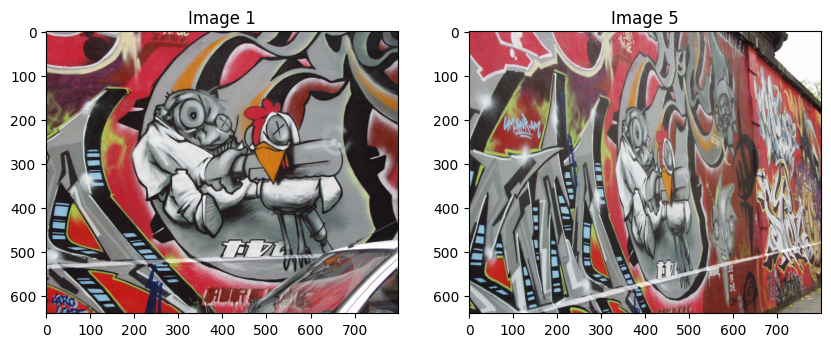

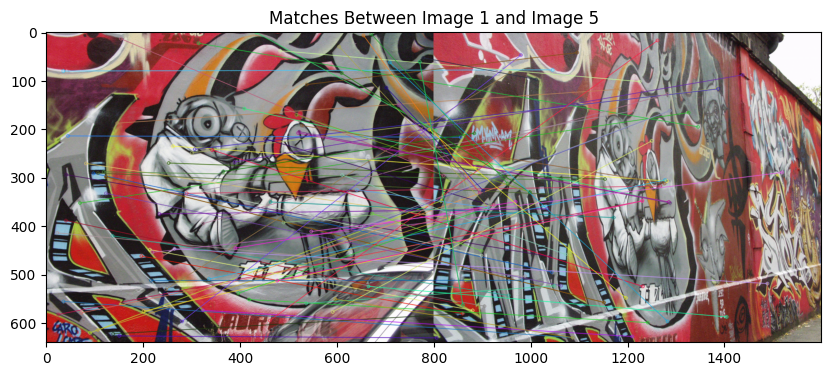

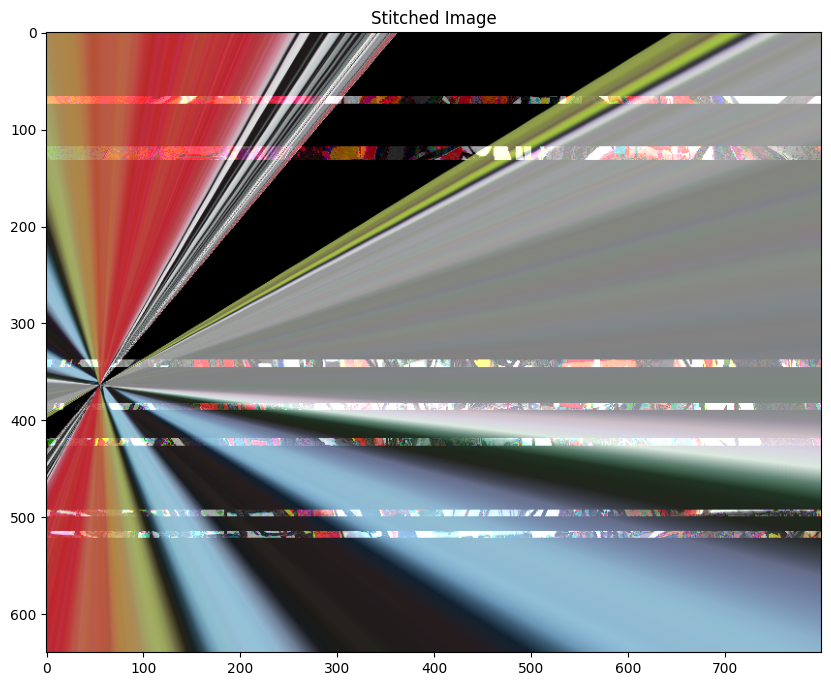

True

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images (img1.ppm and img5.ppm)
image1 = cv2.imread('graf\graf\img1.ppm', cv2.IMREAD_ANYCOLOR)
image5 = cv2.imread('graf/graf/img5.ppm', cv2.IMREAD_ANYCOLOR)

# Plot the images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Image 5')
plt.imshow(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))
plt.show()

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors in both images
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints5, descriptors5 = sift.detectAndCompute(image5, None)

# Create a brute-force matcher
bf_matcher = cv2.BFMatcher()

# Match descriptors between both images using KNN
matches = bf_matcher.knnMatch(descriptors1, descriptors5, k=2)

# Apply Lowe's ratio test to filter out good matches
good_matches = []
points1 = []
points5 = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
        points1.append(keypoints1[m.queryIdx].pt)
        points5.append(keypoints5[m.trainIdx].pt)

# Convert points1 and points5 to NumPy arrays
points1 = np.float32(points1)
points5 = np.float32(points5)

# Compute the homography matrix using RANSAC
homography_matrix, mask = cv2.findHomography(points1, points5, cv2.RANSAC, 5.0)

# Warp image1 to align with image5 using the homography matrix
warped_image1 = cv2.warpPerspective(image1, homography_matrix, (image5.shape[1] + image1.shape[1], image5.shape[0]))

# Ensure the mask is the same size as image5 and of type CV_8U
mask = mask.astype(np.uint8)
mask = cv2.resize(mask, (image5.shape[1], image5.shape[0]))

# Blend the two images together
result = cv2.bitwise_and(image5, image5, mask=mask)

# Resize warped_image1 to match the size of result
warped_image1 = cv2.resize(warped_image1, (result.shape[1], result.shape[0]))

result = cv2.add(result, warped_image1)

# Plot the image with matches
match_image = cv2.drawMatches(image1, keypoints1, image5, keypoints5, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 10))
plt.title('Matches Between Image 1 and Image 5')
plt.imshow(cv2.cvtColor(match_image, cv2.COLOR_BGR2RGB))
plt.show()

# Display the stitched image
plt.figure(figsize=(10, 10))
plt.title('Stitched Image')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()


# Save the result images
cv2.imwrite('stitched_image.jpg', result)
cv2.imwrite('matches_image.jpg', match_image)
